# Muni Shaming: Machine Learning Component

The code here cleans the muni data, and performs machine learning on the data

### Set-up

In [939]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Data Preprocessing - heroku

In [946]:
muni_df = pd.read_csv('https://muni-db-service.herokuapp.com/data')
muni_df

,Unnamed: 0,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time
0,0,1705,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Outbound,14265,2019-07-23 18:33:55-07:00,2019-07-23 18:44:02-07:00
1,1,1706,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,7,Inbound,15311,2019-07-23 18:41:05-07:00,2019-07-23 18:44:04-07:00
2,2,1707,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Inbound,16125,2019-07-23 18:41:17-07:00,2019-07-23 18:44:05-07:00
3,3,1708,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Outbound,17854,2019-07-23 18:46:17-07:00,2019-07-23 18:44:06-07:00
4,4,1709,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,N,Outbound,15205,2019-07-23 18:37:33-07:00,2019-07-23 18:44:06-07:00
5,5,1710,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,14,Inbound,15583,2019-07-23 18:41:18-07:00,2019-07-23 18:44:07-07:00
6,6,1711,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Outbound,13644,2019-07-23 18:46:05-07:00,2019-07-23 18:44:07-07:00
7,7,1712,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Inbound,15814,2019-07-23 18:45:39-07:00,2019-07-23 18:44:07-07:00
8,8,1713,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Outbound,16609,2019-07-23 18:39:41-07:00,2019-07-23 18:44:08-07:00
9,9,1714,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,N,Inbound,15214,2019-07-23 18:38:56-07:00,2019-07-23 18:44:08-07:00


In [947]:
# if 'Scheduled Arrival Time' in muni_df.columns:
#     muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

# if 'Actual Arrival Time' in muni_df.columns:
#     muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["scheduled_arrival_time"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["expected_arrival_time"])


# if 'time_late' in muni_df.columns:
#     muni_df.drop(["time late"], axis = 1)

# if 'time_early' in muni_df.columns:
#     muni_df.drop(["time early"], axis = 1)
    
    
muni_df["time_early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time_late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

muni_df["minutes early/(late)"] = muni_df["time_early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time_early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time_exact"] = muni_df["hour"] + muni_df["minute"]/60
muni_df["time"] = muni_df["time_exact"].round(decimals=1)

In [948]:
# clean data to remove outliers
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['minutes_early'] <= 50])
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['minutes_early'] >= -50])

# remove weekend data
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] != 5])
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] != 6])

# Create the bins and bin names
bins = [-100, -20, -10, -5, 0, 100]
late_bins = ["more than 20 min late", "10-20 min late", "5-10 min late", "0-5 min late", "ontime or early"]

muni_df["late bin"] = pd.cut(muni_df["minutes_early"], bins, labels=late_bins)

In [949]:
# Create Classes for output
late_classes = [0, 1, 2, 3, 4]
muni_df["late_classes"] = pd.cut(muni_df["minutes_early"], bins, labels=late_classes)


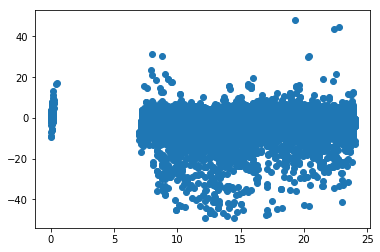

In [950]:
# Plot all data

X_All = muni_df.time.values.reshape(-1, 1)
y_All = muni_df.minutes_early.values.reshape(-1, 1)

plt.scatter(X_All, y_All)

In [951]:
# Create separate dataframe with only selected columns

# muni_df_0 = muni_df[["line_ref","direction_ref", "stop_point_ref", "weekday", "time", "late bin"]]
muni_df_0 = muni_df[["Scheduled Arrival Time", "minutes_early", "line_ref","direction_ref", "stop_point_ref", "time", "late bin"]]
muni_df_0

,Scheduled Arrival Time,minutes_early,line_ref,direction_ref,stop_point_ref,time,late bin
0,2019-07-23 18:33:55-07:00,-10.116667,38,Outbound,14265,18.6,10-20 min late
1,2019-07-23 18:41:05-07:00,-2.983333,7,Inbound,15311,18.7,0-5 min late
2,2019-07-23 18:41:17-07:00,-2.800000,2,Inbound,16125,18.7,0-5 min late
3,2019-07-23 18:46:17-07:00,2.183333,38,Outbound,17854,18.8,ontime or early
4,2019-07-23 18:37:33-07:00,-6.550000,N,Outbound,15205,18.6,5-10 min late
5,2019-07-23 18:41:18-07:00,-2.816667,14,Inbound,15583,18.7,0-5 min late
6,2019-07-23 18:46:05-07:00,1.966667,2,Outbound,13644,18.8,ontime or early
7,2019-07-23 18:45:39-07:00,1.533333,38,Inbound,15814,18.8,ontime or early
8,2019-07-23 18:39:41-07:00,-4.450000,2,Outbound,16609,18.6,0-5 min late
9,2019-07-23 18:38:56-07:00,-5.200000,N,Inbound,15214,18.6,5-10 min late


In [952]:
# Reformat data
data = muni_df_0.values

X1 = data[:, 2]
X2 = data[:, 3]
X3 = data[:, 4]
X4 = data[:, 5]
# X5 = data[:, 4]
y = data[:, 6]


In [953]:
# get_dummies

In [954]:
# Label-encode data set

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(X1)
encoded_X1 = label_encoder.transform(X1)

label_encoder.fit(X2)
encoded_X2 = label_encoder.transform(X2)

label_encoder.fit(X3)
encoded_X3 = label_encoder.transform(X3)


time_data = [i/10 for i in range(0, 25*10)]
X4_encoding = time_data

# label_encoder.fit(X4)
label_encoder.fit(X4_encoding)
encoded_X4 = label_encoder.transform(X4)

# label_encoder.fit(X5)
# encoded_X5 = label_encoder.transform(X5)

In [955]:
# Append encoded data to the dataframe

muni_df_0["line_encoded"] = encoded_X1
muni_df_0["direction_encoded"] = encoded_X2
muni_df_0["stop_encoded"] = encoded_X3
# muni_df_0["weekday_encoded"] = encoded_X4
muni_df_0["time_encoded"] = encoded_X4

muni_df_0["late_class"] = muni_df["late_classes"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [956]:
muni_df_0.head()

,Scheduled Arrival Time,minutes_early,line_ref,direction_ref,stop_point_ref,time,late bin,line_encoded,direction_encoded,stop_encoded,time_encoded,late_class
0,2019-07-23 18:33:55-07:00,-10.116667,38,Outbound,14265,18.6,10-20 min late,2,1,71,186,1
1,2019-07-23 18:41:05-07:00,-2.983333,7,Inbound,15311,18.7,0-5 min late,3,0,202,187,3
2,2019-07-23 18:41:17-07:00,-2.800000,2,Inbound,16125,18.7,0-5 min late,1,0,364,187,3
3,2019-07-23 18:46:17-07:00,2.183333,38,Outbound,17854,18.8,ontime or early,2,1,453,188,4
4,2019-07-23 18:37:33-07:00,-6.550000,N,Outbound,15205,18.6,5-10 min late,5,1,166,186,2


In [957]:
# Assign the data to X and y
data = muni_df_0.values

X = data[:, 7:11]
y = data[:, 11]

# X = data[:, 6:11]
# y = data[:, 11]

In [958]:
X

array([[2, 1, 71, 186],
       [3, 0, 202, 187],
       [1, 0, 364, 187],
       ...,
       [3, 1, 137, 164],
       [1, 0, 304, 163],
       [2, 0, 457, 164]], dtype=object)

In [959]:
y

array([1, 3, 3, ..., 4, 3, 4], dtype=object)

In [960]:
y = y.reshape(-1, 1)

In [961]:
print("Shape: ", X.shape, y.shape)

Shape:  (15615, 4) (15615, 1)


In [962]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## MACHINE LEARNING USING NEURAL NETWORKS

For this data, we are selecting a multi-lable classification model
 
 K-nearest neighbours
 Xxtreme gradient boost
 SVM
 Decision Trees (Random Forest)
 Neural Network

### Data Preprocessing

In [963]:
# Create scaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [964]:
# Scale both the test and the train data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [965]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### Creating our Model
For numerical data, we use a regressor model.
For categorical data, we use a classifier model.

In [568]:
# in this model, we are using multi-label classification

### Defining our Model Architecture (the layers)

In determining the number of hidden nodes, we referenced the following information
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [966]:
# create a sequential model

from keras.models import Sequential
model = Sequential()

In [967]:
# add first layer. Specify both the number of inputs and the number of nodes in the hidden layer.

from keras.layers import Dense
number_inputs = 4
number_hidden_nodes = 5
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [968]:
# Specify the activation function (typically softmax for classification)and 
# the number of classes (labels) that we are trying to predict in output layer

number_classes = muni_df_0['late_class'].nunique()
model.add(Dense(units=number_classes, activation='softmax'))

### Model Summary

In [969]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 30        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [970]:
# compile the model using a loss function and optimizer

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # if output layer is linear, use loss = 'mse' (mean squared error)
              metrics=['accuracy'])

### Training the Model

For information of verbose selection, read https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model

For information on model.fit read https://keras.io/models/model/

In [971]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,  # number of itterations (loops)
    shuffle=True,
    verbose=2
)

Epoch 1/500
 - 1s - loss: 1.5673 - acc: 0.3005
Epoch 2/500
 - 0s - loss: 1.2802 - acc: 0.4524
Epoch 3/500
 - 0s - loss: 1.1990 - acc: 0.4655
Epoch 4/500
 - 0s - loss: 1.1675 - acc: 0.4575
Epoch 5/500
 - 0s - loss: 1.1538 - acc: 0.4617
Epoch 6/500
 - 0s - loss: 1.1473 - acc: 0.4636
Epoch 7/500
 - 0s - loss: 1.1436 - acc: 0.4641
Epoch 8/500
 - 0s - loss: 1.1413 - acc: 0.4661
Epoch 9/500
 - 0s - loss: 1.1398 - acc: 0.4655
Epoch 10/500
 - 0s - loss: 1.1385 - acc: 0.4679
Epoch 11/500
 - 0s - loss: 1.1374 - acc: 0.4641
Epoch 12/500
 - 0s - loss: 1.1365 - acc: 0.4653
Epoch 13/500
 - 0s - loss: 1.1351 - acc: 0.4644
Epoch 14/500
 - 0s - loss: 1.1336 - acc: 0.4673
Epoch 15/500
 - 0s - loss: 1.1316 - acc: 0.4689
Epoch 16/500
 - 0s - loss: 1.1297 - acc: 0.4668
Epoch 17/500
 - 0s - loss: 1.1284 - acc: 0.4682
Epoch 18/500
 - 0s - loss: 1.1272 - acc: 0.4705
Epoch 19/500
 - 0s - loss: 1.1260 - acc: 0.4720
Epoch 20/500
 - 0s - loss: 1.1254 - acc: 0.4759
Epoch 21/500
 - 0s - loss: 1.1245 - acc: 0.4755
E

Epoch 171/500
 - 0s - loss: 1.1116 - acc: 0.4878
Epoch 172/500
 - 0s - loss: 1.1114 - acc: 0.4885
Epoch 173/500
 - 0s - loss: 1.1113 - acc: 0.4884
Epoch 174/500
 - 0s - loss: 1.1114 - acc: 0.4889
Epoch 175/500
 - 0s - loss: 1.1116 - acc: 0.4870
Epoch 176/500
 - 0s - loss: 1.1114 - acc: 0.4871
Epoch 177/500
 - 0s - loss: 1.1113 - acc: 0.4861
Epoch 178/500
 - 0s - loss: 1.1111 - acc: 0.4873
Epoch 179/500
 - 0s - loss: 1.1114 - acc: 0.4855
Epoch 180/500
 - 0s - loss: 1.1113 - acc: 0.4846
Epoch 181/500
 - 0s - loss: 1.1110 - acc: 0.4886
Epoch 182/500
 - 0s - loss: 1.1110 - acc: 0.4902
Epoch 183/500
 - 0s - loss: 1.1110 - acc: 0.4856
Epoch 184/500
 - 0s - loss: 1.1111 - acc: 0.4881
Epoch 185/500
 - 0s - loss: 1.1111 - acc: 0.4863
Epoch 186/500
 - 0s - loss: 1.1112 - acc: 0.4878
Epoch 187/500
 - 0s - loss: 1.1110 - acc: 0.4867
Epoch 188/500
 - 0s - loss: 1.1110 - acc: 0.4862
Epoch 189/500
 - 0s - loss: 1.1109 - acc: 0.4879
Epoch 190/500
 - 0s - loss: 1.1107 - acc: 0.4870
Epoch 191/500
 - 0s 

 - 0s - loss: 1.1074 - acc: 0.4910
Epoch 339/500
 - 0s - loss: 1.1077 - acc: 0.4895
Epoch 340/500
 - 0s - loss: 1.1078 - acc: 0.4916
Epoch 341/500
 - 0s - loss: 1.1078 - acc: 0.4876
Epoch 342/500
 - 0s - loss: 1.1079 - acc: 0.4910
Epoch 343/500
 - 0s - loss: 1.1079 - acc: 0.4900
Epoch 344/500
 - 0s - loss: 1.1079 - acc: 0.4890
Epoch 345/500
 - 0s - loss: 1.1076 - acc: 0.4918
Epoch 346/500
 - 0s - loss: 1.1077 - acc: 0.4889
Epoch 347/500
 - 0s - loss: 1.1075 - acc: 0.4890
Epoch 348/500
 - 0s - loss: 1.1078 - acc: 0.4880
Epoch 349/500
 - 0s - loss: 1.1078 - acc: 0.4901
Epoch 350/500
 - 0s - loss: 1.1078 - acc: 0.4915
Epoch 351/500
 - 0s - loss: 1.1076 - acc: 0.4920
Epoch 352/500
 - 0s - loss: 1.1077 - acc: 0.4880
Epoch 353/500
 - 0s - loss: 1.1072 - acc: 0.4912
Epoch 354/500
 - 0s - loss: 1.1080 - acc: 0.4882
Epoch 355/500
 - 0s - loss: 1.1075 - acc: 0.4903
Epoch 356/500
 - 0s - loss: 1.1077 - acc: 0.4909
Epoch 357/500
 - 0s - loss: 1.1077 - acc: 0.4904
Epoch 358/500
 - 0s - loss: 1.1076

### Quantify the Data
Best case is loss of 0, and accurcay of 1

In [973]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.1023736410021896, Accuracy: 0.499519692670066


### Making predictions with New Data

In [974]:
import numpy as np
new_data = np.array([[1, 0, 364, 125]])
print(f"Predicted class: {model.predict_classes(new_data)}")

Predicted class: [3]


### Export model and data encoder

In [975]:
import pickle

with open('time_encoder.pkl', "wb") as file_path:
    pickle.dump(label_encoder, file_path)
    
with open('model_encoder.pkl', 'wb') as file_path:
    pickle.dump(model, file_path)

In [976]:
#Export Dataframe to CSV

muni_df_0.to_csv("data.csv", index=False, header=True)

## CODE BELOW = TEST CODE NOT USED

 ### Data Preprocessing - json

In [235]:
# convert the jason file to a python dictionary

muni_file = "MUNI-Stop-prediction.json"
with open(muni_file,"r") as f:
    muni_json = json.load(f)

In [236]:
# capture metadata

ResponseTimestamp = muni_json["ServiceDelivery"]["ResponseTimestamp"]
ProducerRef = muni_json["ServiceDelivery"]["ProducerRef"]
Status = muni_json["ServiceDelivery"]["Status"]
version = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["version"]

In [167]:
# create a dataframe from a dictionary from within the python dictionary, using a normalize function

from pandas.io.json import json_normalize

MonitoredStopVisit_json = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["MonitoredStopVisit"]
muni_df = pd.DataFrame.from_dict(json_normalize(MonitoredStopVisit_json), orient='columns')

muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,MonitoredVehicleJourney.Occupancy,MonitoredVehicleJourney.OperatorRef,MonitoredVehicleJourney.OriginName,MonitoredVehicleJourney.OriginRef,MonitoredVehicleJourney.PublishedLineName,MonitoredVehicleJourney.VehicleLocation.Latitude,MonitoredVehicleJourney.VehicleLocation.Longitude,MonitoredVehicleJourney.VehicleRef,MonitoringRef,RecordedAtTime
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,None,SF,Bowley St & Lincoln Blvd,13706,SUNSET,37.7630653,-122.496071,8833,16531,2019-07-18T22:22:33Z
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,None,SF,Sacramento St & Cherry St,16293,ASHBURY-18TH ST,37.7611389,-122.430641,8157,13323,2019-07-18T22:22:33Z
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.769268,-122.450745,8960,14092,2019-07-18T22:22:33Z
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.7985458,-122.446899,8966,15293,2019-07-18T22:22:33Z
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,None,SF,Geary Blvd & 33rd Ave,14277,CALIFORNIA,37.7798538,-122.493126,5791,13555,2019-07-18T22:22:33Z


In [168]:
# append the metadata to the dataframe
muni_df["ResponseTimestamp"] = ResponseTimestamp
muni_df["ProducerRef"] = ProducerRef
muni_df["Status"] = Status
muni_df["version"] = version

In [ ]:
muni_df

In [171]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.ExpectedArrivalTime"])


if 'time late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)
    
muni_df["time early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]


muni_df["minutes early/(late)"] = muni_df["time early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

muni_df.head()

In [547]:
#FILTER 1 - WEEKDAY

# Get list of weekdays for user
weekday = set(muni_df["weekday"].values)
print(weekday)

# user selects line
selected_weekday = 2

# filter data for selected line
df_1 = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] == selected_weekday])

{1, 2, 3, 4, 5}


In [ ]:
# Grab filtered data
selected_muni_df = df_1 #--> using all data for now!

selected_muni_df.head()

In [ ]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
plt.scatter(X, y)

 ### Data Preprocessing - csv


In [ ]:
muni_df = pd.read_csv('prediction_samples/muni_prediction_sample.csv')
muni_df.head()

In [ ]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["scheduled_arrival_time"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["expected_arrival_time"])


if 'time_late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time_early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)
    
    
muni_df["time_early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time_late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

muni_df["minutes early/(late)"] = muni_df["time_early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time_early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [ ]:
muni_df

In [ ]:
#FILTER 1 - WEEKDAY

# Get list of weekdays for user
weekday = set(muni_df["weekday"].values)
print(weekday)

# user selects line
selected_weekday = 2

# filter data for selected line
df_1 = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] == selected_weekday])

In [ ]:
#FILTER 2 - TIME

# user selects time
selected_time = 18

# filter data for selected line
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_1[df_1['time'] <= selected_time +.5])
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['time'] >= selected_time -.5])

In [ ]:
#FILTER 3 - MUNI LINE

# Get list of lines for user
lines = set(df_2["line_ref"].values)
print(lines)

# user selects line
selected_line = 'N'

# filter data for selected line
df_3 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['line_ref'] == selected_line])

In [ ]:
#FILTER 4 - INBOUND / OUTBOUND

# Get list of lines for user
in_out = set(df_3["direction_ref"].values)
print(in_out)

# user selects line
selected_direction = 'Outbound'

# filter data for selected line
df_4 = pd.DataFrame(columns = muni_df.columns).append(df_3[df_3['direction_ref'] == selected_direction])

In [ ]:
#FILTER 5 - MUNI STOP

stops = set(df_4["stop_point_ref"].values)
print(stops)

# user selects line
selected_stop = 17217

# filter data for selected line
df_5 = pd.DataFrame(columns = muni_df.columns).append(df_4[df_4['stop_point_ref'] == selected_stop])

In [ ]:
# Grab filtered data
selected_muni_df = df_4 #--> using data at this filter number

selected_muni_df

In [ ]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
plt.scatter(X, y)